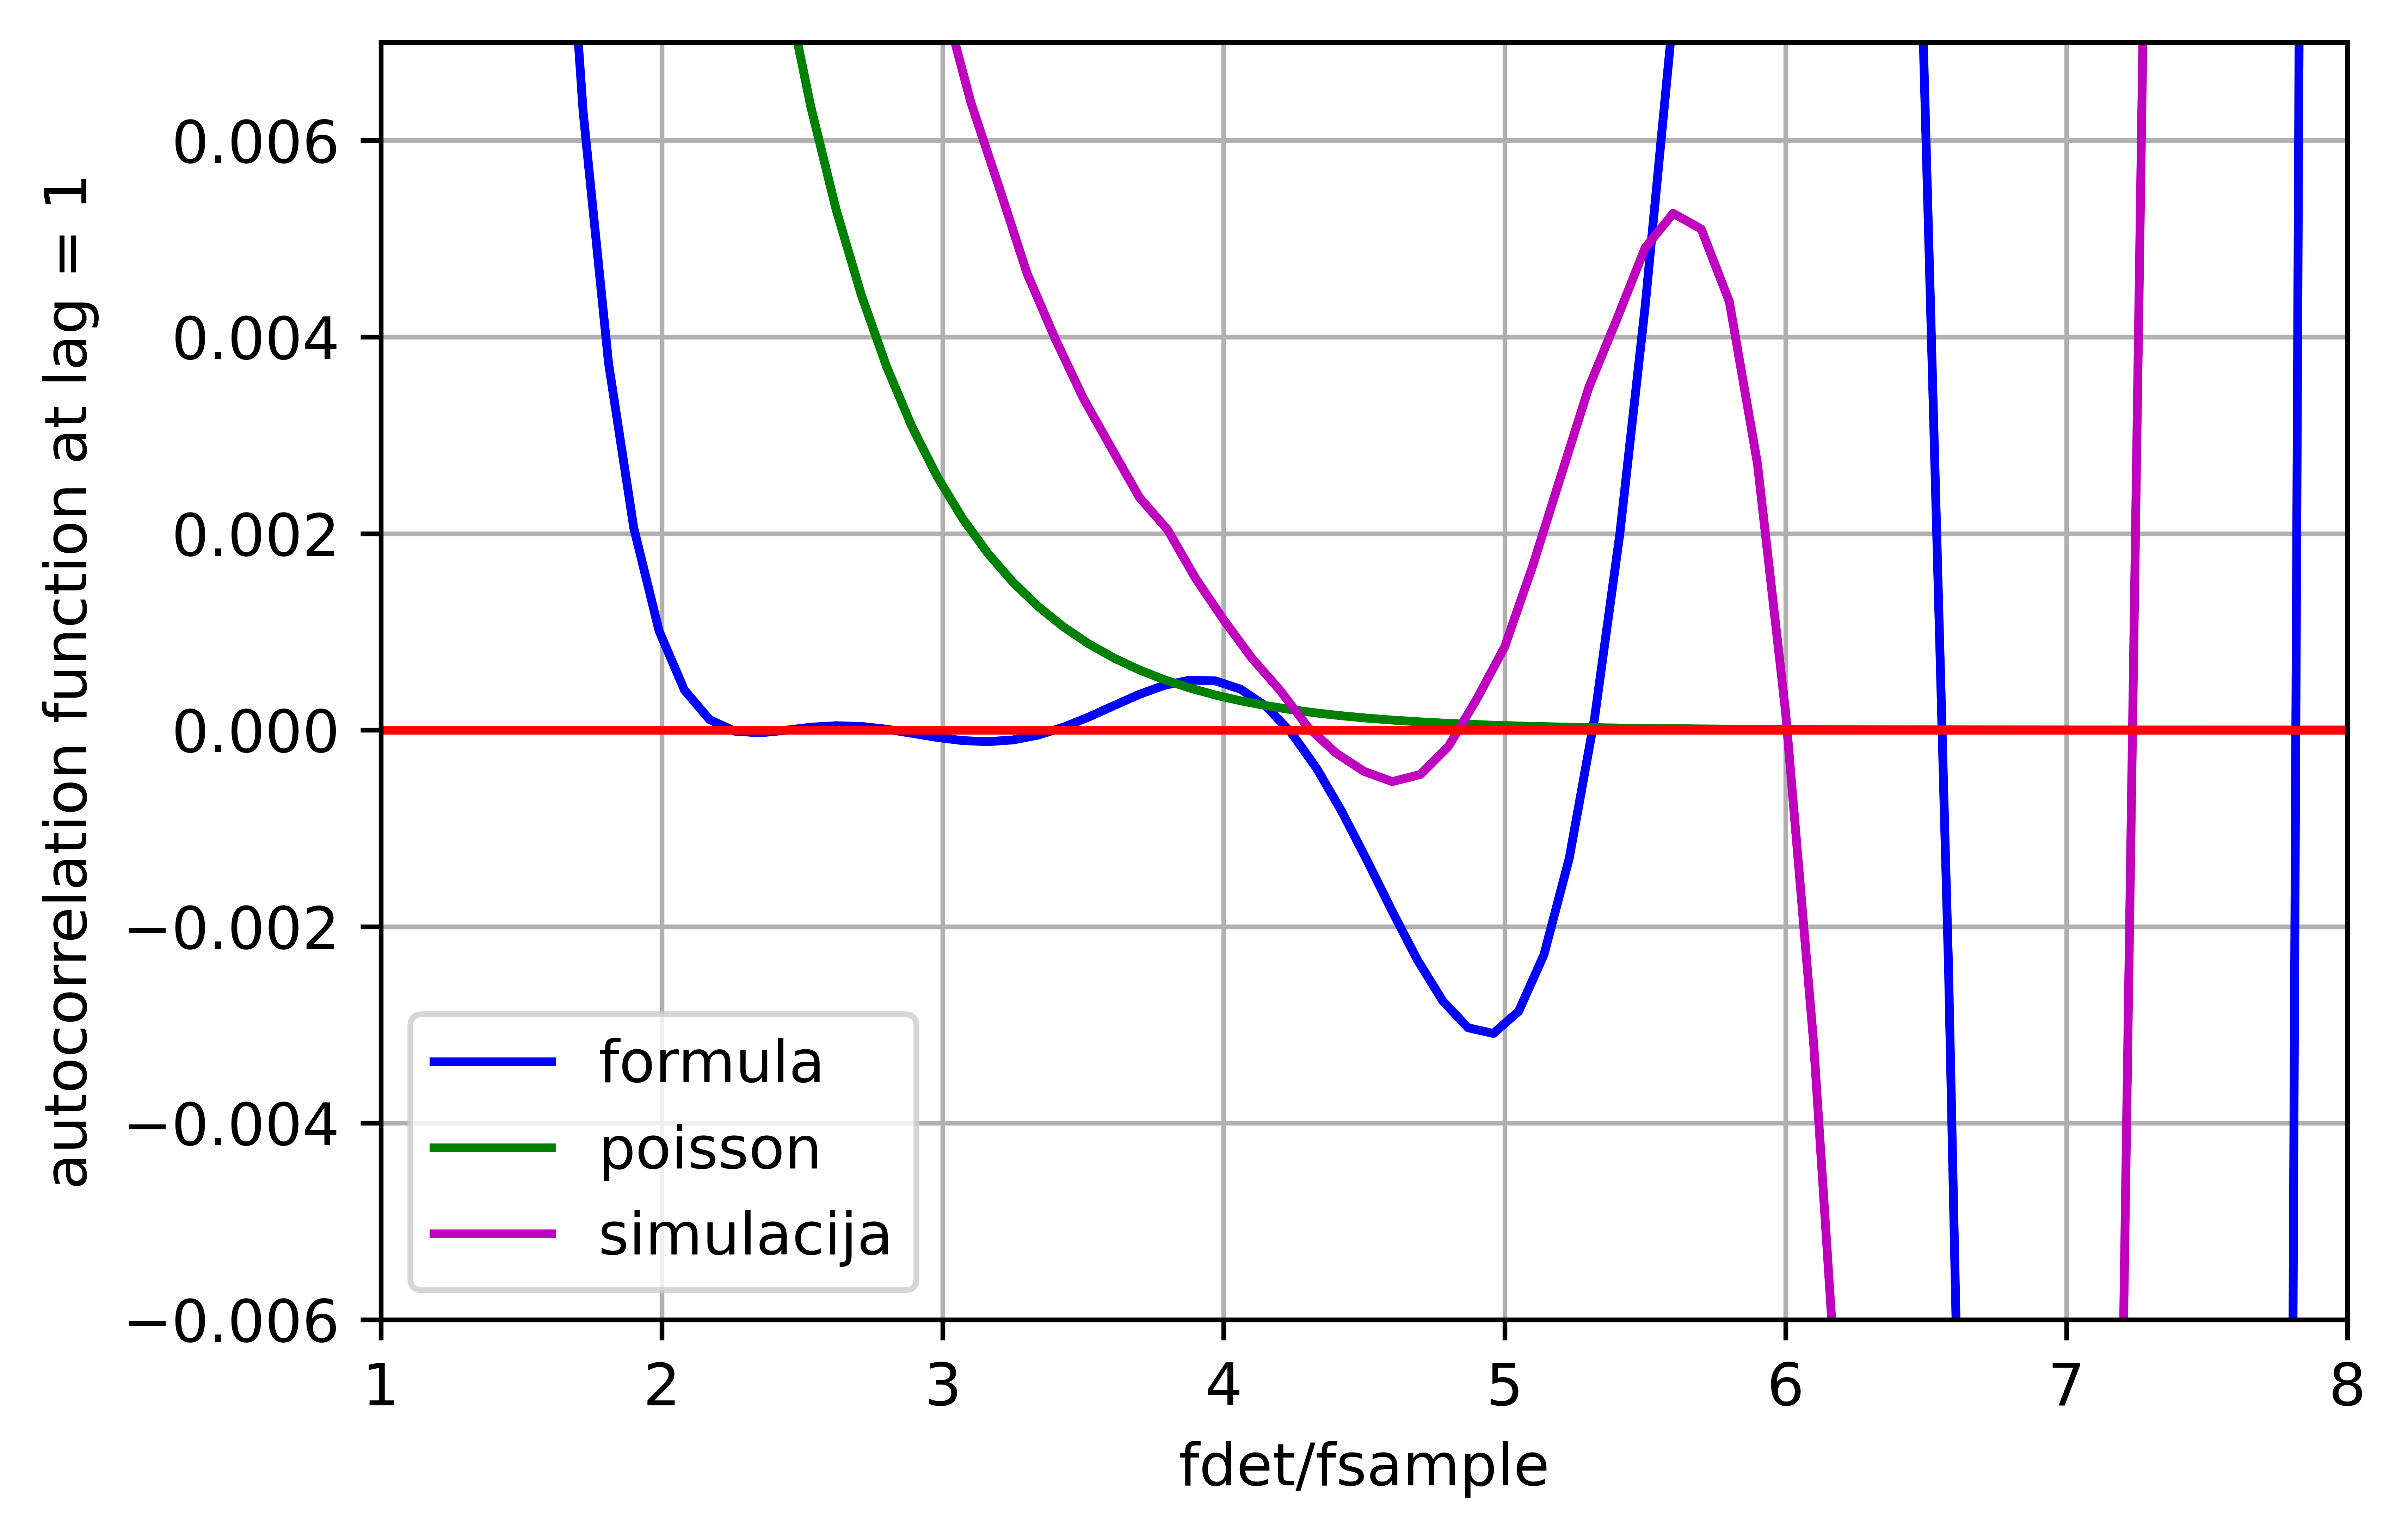

<Figure size 432x288 with 0 Axes>

In [34]:
import numpy as np
from scipy.stats import poisson, erlang
import math
import matplotlib.pyplot as plt

def range1(end):
    return range(np.int(end+1))

def s1_calc(t, c, la):
    suma1 = 0.0
    suma2 = 0.0
    for n in range1(np.floor(t/2/c)):
        if n != 0:
            val=erlang.cdf(t-2*n*c, 2*n, loc=0, scale=1/la)
        else:
            val = 1
        suma1 = suma1 + val

    for n in range1(np.floor(t/2/c-0.5)):
        val=erlang.cdf(t-(2*n+1)*c, 2*n+1, loc=0, scale=1/la)
        suma2 = suma2 - val      
        
    return (suma1 + suma2)

# odredjivanje potencijalnih vrijednosti parametara
tz = 100
fsample = 1/tz
c = 10
fdet = np.linspace(fsample, 1/c, num=100, endpoint=False) #jer fdet * c <= 1
lam = [x / (1-c*x) for x in fdet]

# teorijski izracun autokorelacijskog koeficijenta a1
s1 = [s1_calc(tz, c, la) for la in lam]
a1 = [2*s1_elem-1 for s1_elem in s1]
a1_poisson = [np.exp(-2*fdet_elem/fsample) for fdet_elem in fdet]

# usporedba s outputom simulacije
data= np.loadtxt('dt10ns_fs_10M_fdet.txt', skiprows=1);
a1_sim = data[:,5]
fdet_sim = data[:,3]
fsample_sim = data[:,1]

# graficki prikaz
plt.figure(dpi=1200)
plt.plot(np.array(fdet)/fsample, np.array(a1), 'b')
plt.plot(np.array(fdet)/fsample, np.array(a1_poisson), 'g')
plt.plot(np.array(fdet_sim)/fsample_sim, np.array(a1_sim), 'm')
plt.ylabel('autocorrelation function at lag = 1')
plt.xlabel('fdet/fsample')
plt.axhline(y=0.0, color='r')
plt.grid(visible=True)
plt.ylim([-6e-3, 7e-3])
plt.xlim([1,8])
plt.legend(['formula', 'poisson', 'simulacija'])

plt.show()
plt.savefig('fdet_autocorr_curve.png', dpi=1200)
